In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv',encoding='utf-8', sep=',' )
test = pd.read_csv('test.csv',encoding='utf-8', sep=',' )
sample_submission = pd.read_csv('sample_submission.csv',encoding='utf-8', sep=',')


In [3]:
train.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [4]:
test.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [5]:
sample_submission.head()

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0
1,ccac3879652b08cb8b44c1920fd93afa,0
2,fcccab4d7a76f70647f015f2c84c2af8,0
3,ed8399278c30678dab739045fa12b440,0
4,1d4d62ac5cabcb48bac7112813f290cb,0


In [6]:
df = test.append(train).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
_id               41188 non-null object
age               41188 non-null int64
campaign          41188 non-null int64
cons.conf.idx     41188 non-null float64
cons.price.idx    41188 non-null float64
contact           41188 non-null object
day_of_week       41188 non-null object
default           41188 non-null object
duration          41188 non-null int64
education         41188 non-null object
emp.var.rate      41188 non-null float64
euribor3m         41188 non-null float64
housing           41188 non-null object
job               41188 non-null object
loan              41188 non-null object
marital           41188 non-null object
month             41188 non-null object
nr.employed       41188 non-null float64
pdays             41188 non-null int64
poutcome          41188 non-null object
previous          41188 non-null int64
target            24712 non-null float64
dtypes: fl

D:\Anaconda\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [7]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

_id
{'2a63f6310ca87e591790fff5eb6c8cde', '3d7e5f421c02f5dc68b3f98319535e41', 'd25f449b715d1bbe464e8bcf97d713c5', 'c8b0bbb8a7de1c4a148a433ba2627d15', 'd6e2ab4c83f4733356fbaa0e4ec936d3', 'c2e79ff327dbca13db92c31d6c2cc142', 'c01ecef55f7b2fccda8be3a937dbc1e5', 'cd110531fb58243d28cfda07d4029826', '7141cf042b687fe85a892d984be16f7b', 'bc21972d7c8803e3b18cf6e83aa04e12', '8b9c7f081ffe3361384699ccb0d3bc30', 'd764ed329f93aa6b1068020d675b7253', 'b2774de8a806eaca28d9b8240223eda4', 'b996327cb8404f42c3fb4bec2585ae3b', '5550c996b73e84bad5b392cb46f7d706', 'd5ef7c37bb1da7bb4c7100037442a480', 'efef14c881e499ee099aa36efd21679f', 'df9d129c9ea0d3454af0445ecec2d49a', 'c1fe9c7be8d89429635c6cc031b4dcac', '811a918fcbfaaee382fab5eacf3eee1c', '67685a821f0f7bc454b83699da01b4ce', '24bebe4e8fa4ba8767f7b03742e0ebb7', '71beb3a17f90c79ebfe9784012544a2e', '103d53195831078faabdacc784b0eeb7', 'e712803d8a57e5af3fdae618121bbc08', 'dc829fc75b3bcf98d5de1f3ba53b66a1', 'fa6c7d80a9fc6bfb04904c53d12330c9', '911ff046826d0024ec5eca

In [8]:
def preproc_data(df_input):
    df_output = df_input.copy()
    #уберем колонку
    df_output=df_output.drop(['_id'],axis=1)
    #Работаем с числовым форматом
    #df_output['PERSONAL_INCOME']=df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    #df_output['CREDIT']=df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    #df_output['FST_PAYMENT']=df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    #df_output['LOAN_AVG_DLQ_AMT']=df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    #df_output['LOAN_MAX_DLQ_AMT']=df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    #заполняем в числовых колонках NAN на 0
    #df_output[['WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED']]=df_output[['WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED']] .fillna(value=0)
    #Разбиваем на категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['contact', 'day_of_week','default','education', 'housing','job','loan','marital','month','poutcome'])
    
    #Дропаем все остальное
    #df_output = df_output.drop([ 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE','ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'TP_PROVINCE', 'REGION_NM'], axis=1)
    
    ## Your Code Here
    
    return df_output

In [9]:
df_train_preproc = train.pipe(preproc_data)
#df_test_preproc = test.pipe(preproc_data)
#вижимо тут разделяе снова на 2 типа данных(обучение и тестовые)
#df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
#df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [10]:
#здесь раскдываем эти данные на фичи и таргеты по данным train и test
y=df_train_preproc['target']
x=df_train_preproc.drop('target', axis=1)


In [11]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42
## Your Code Here

#а тут разделяем треин данные на обучение и тестовые 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)


In [12]:
try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=123)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

train_scores, valid_scores = validation_curve(model, x, y, 
                                              'max_depth', range(1, 10),
                                              cv=cv, scoring='roc_auc')

Text(0,0.5,'ROC AUC')

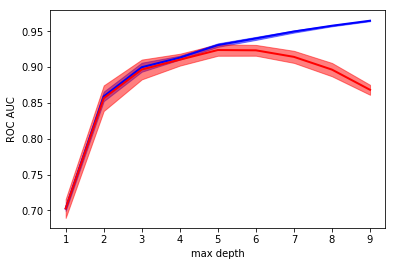

In [14]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,10), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,10), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='b', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')

In [15]:
from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold


RND_SEED = 123

In [18]:
# Определим пространство поиска

from dask.diagnostics import ProgressBar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(4, 9),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']}

# Некоторые параметры мы задали не простым перечислением значений, а 
# с помощью распределений.

# Будем делать 200 запусков поиска
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,verbose=10,
                                   cv=cv, scoring='roc_auc', random_state=123)
# А дальше, просто .fit()
random_search.fit(x, y)

with ProgressBar():

   random_search.fit(x, y)

model = random_search.best_params_

print(model)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.0s
[Paralle

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.0s
[Paralle

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 9}


In [19]:
from sklearn.tree import DecisionTreeClassifier
# dtc - DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced',criterion='entropy', max_depth=6, min_samples_leaf= 9,random_state=123)
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test)


In [20]:

from sklearn.metrics import accuracy_score, precision_score, recall_score
# dtc - DecisionTreeClassifier
print('dtc_accuracy', accuracy_score(y_test, dtc_predict))
print('dtc_precision', precision_score(y_test, dtc_predict))
print('dtc_recall', recall_score(y_test, dtc_predict))

dtc_accuracy 0.8282615733247005
dtc_precision 0.3860182370820669
dtc_recall 0.9256559766763849


In [21]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
dtc = DecisionTreeClassifier(class_weight='balanced',criterion='entropy', max_depth=6, min_samples_leaf= 9,random_state=123)
dtc_roc_auc = cross_val_score(
    dtc,
    x,
    y,
    scoring='roc_auc',
    cv=10
)
print ('dtc_roc_auc', dtc_roc_auc.mean())



D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


dtc_roc_auc 0.9374141344155855


In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
dtc.fit(x, y)
dtc_predict_proba = dtc.predict_proba(X_test)
dtc_predict_proba[:,1]
print('dtc_roc_auc_на_тесте', roc_auc_score(y_test, dtc_predict_proba[:,1]))

dtc_roc_auc_на_тесте 0.9475120450843952
